In [1]:
import os
import glob
import netCDF4
import logging
import numpy as np
import cmocean
import calendar
import emodnetchemistry
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import calendar
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
plt.rcParams.update({'font.size': 16})
plt.rc('figure', facecolor='w')
from importlib import reload
reload(emodnetchemistry)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry3/EMODnet-Chemistry/python/emodnetchemistry.py'>

In [3]:
datafile = "/home/ctroupin/Water body phosphate_Winter.4Danl.nc"

In [5]:
with netCDF4.Dataset(datafile, "r") as nc:
    lon = nc.variables["lon"][:]
    lat = nc.variables["lat"][:]
    deepestdepth = nc.variables["Water body phosphate_deepest_depth"][:]

In [9]:
domain = [lon.min(), lon.max(), lat.min(), lat.max()]
m = Basemap(projection='merc', llcrnrlon=domain[0], llcrnrlat=domain[2],
            urcrnrlon=domain[1], urcrnrlat=domain[3],
            lat_ts=0.5 * (domain[2] + domain[3]), resolution='i')
llon, llat = np.meshgrid(lon, lat)

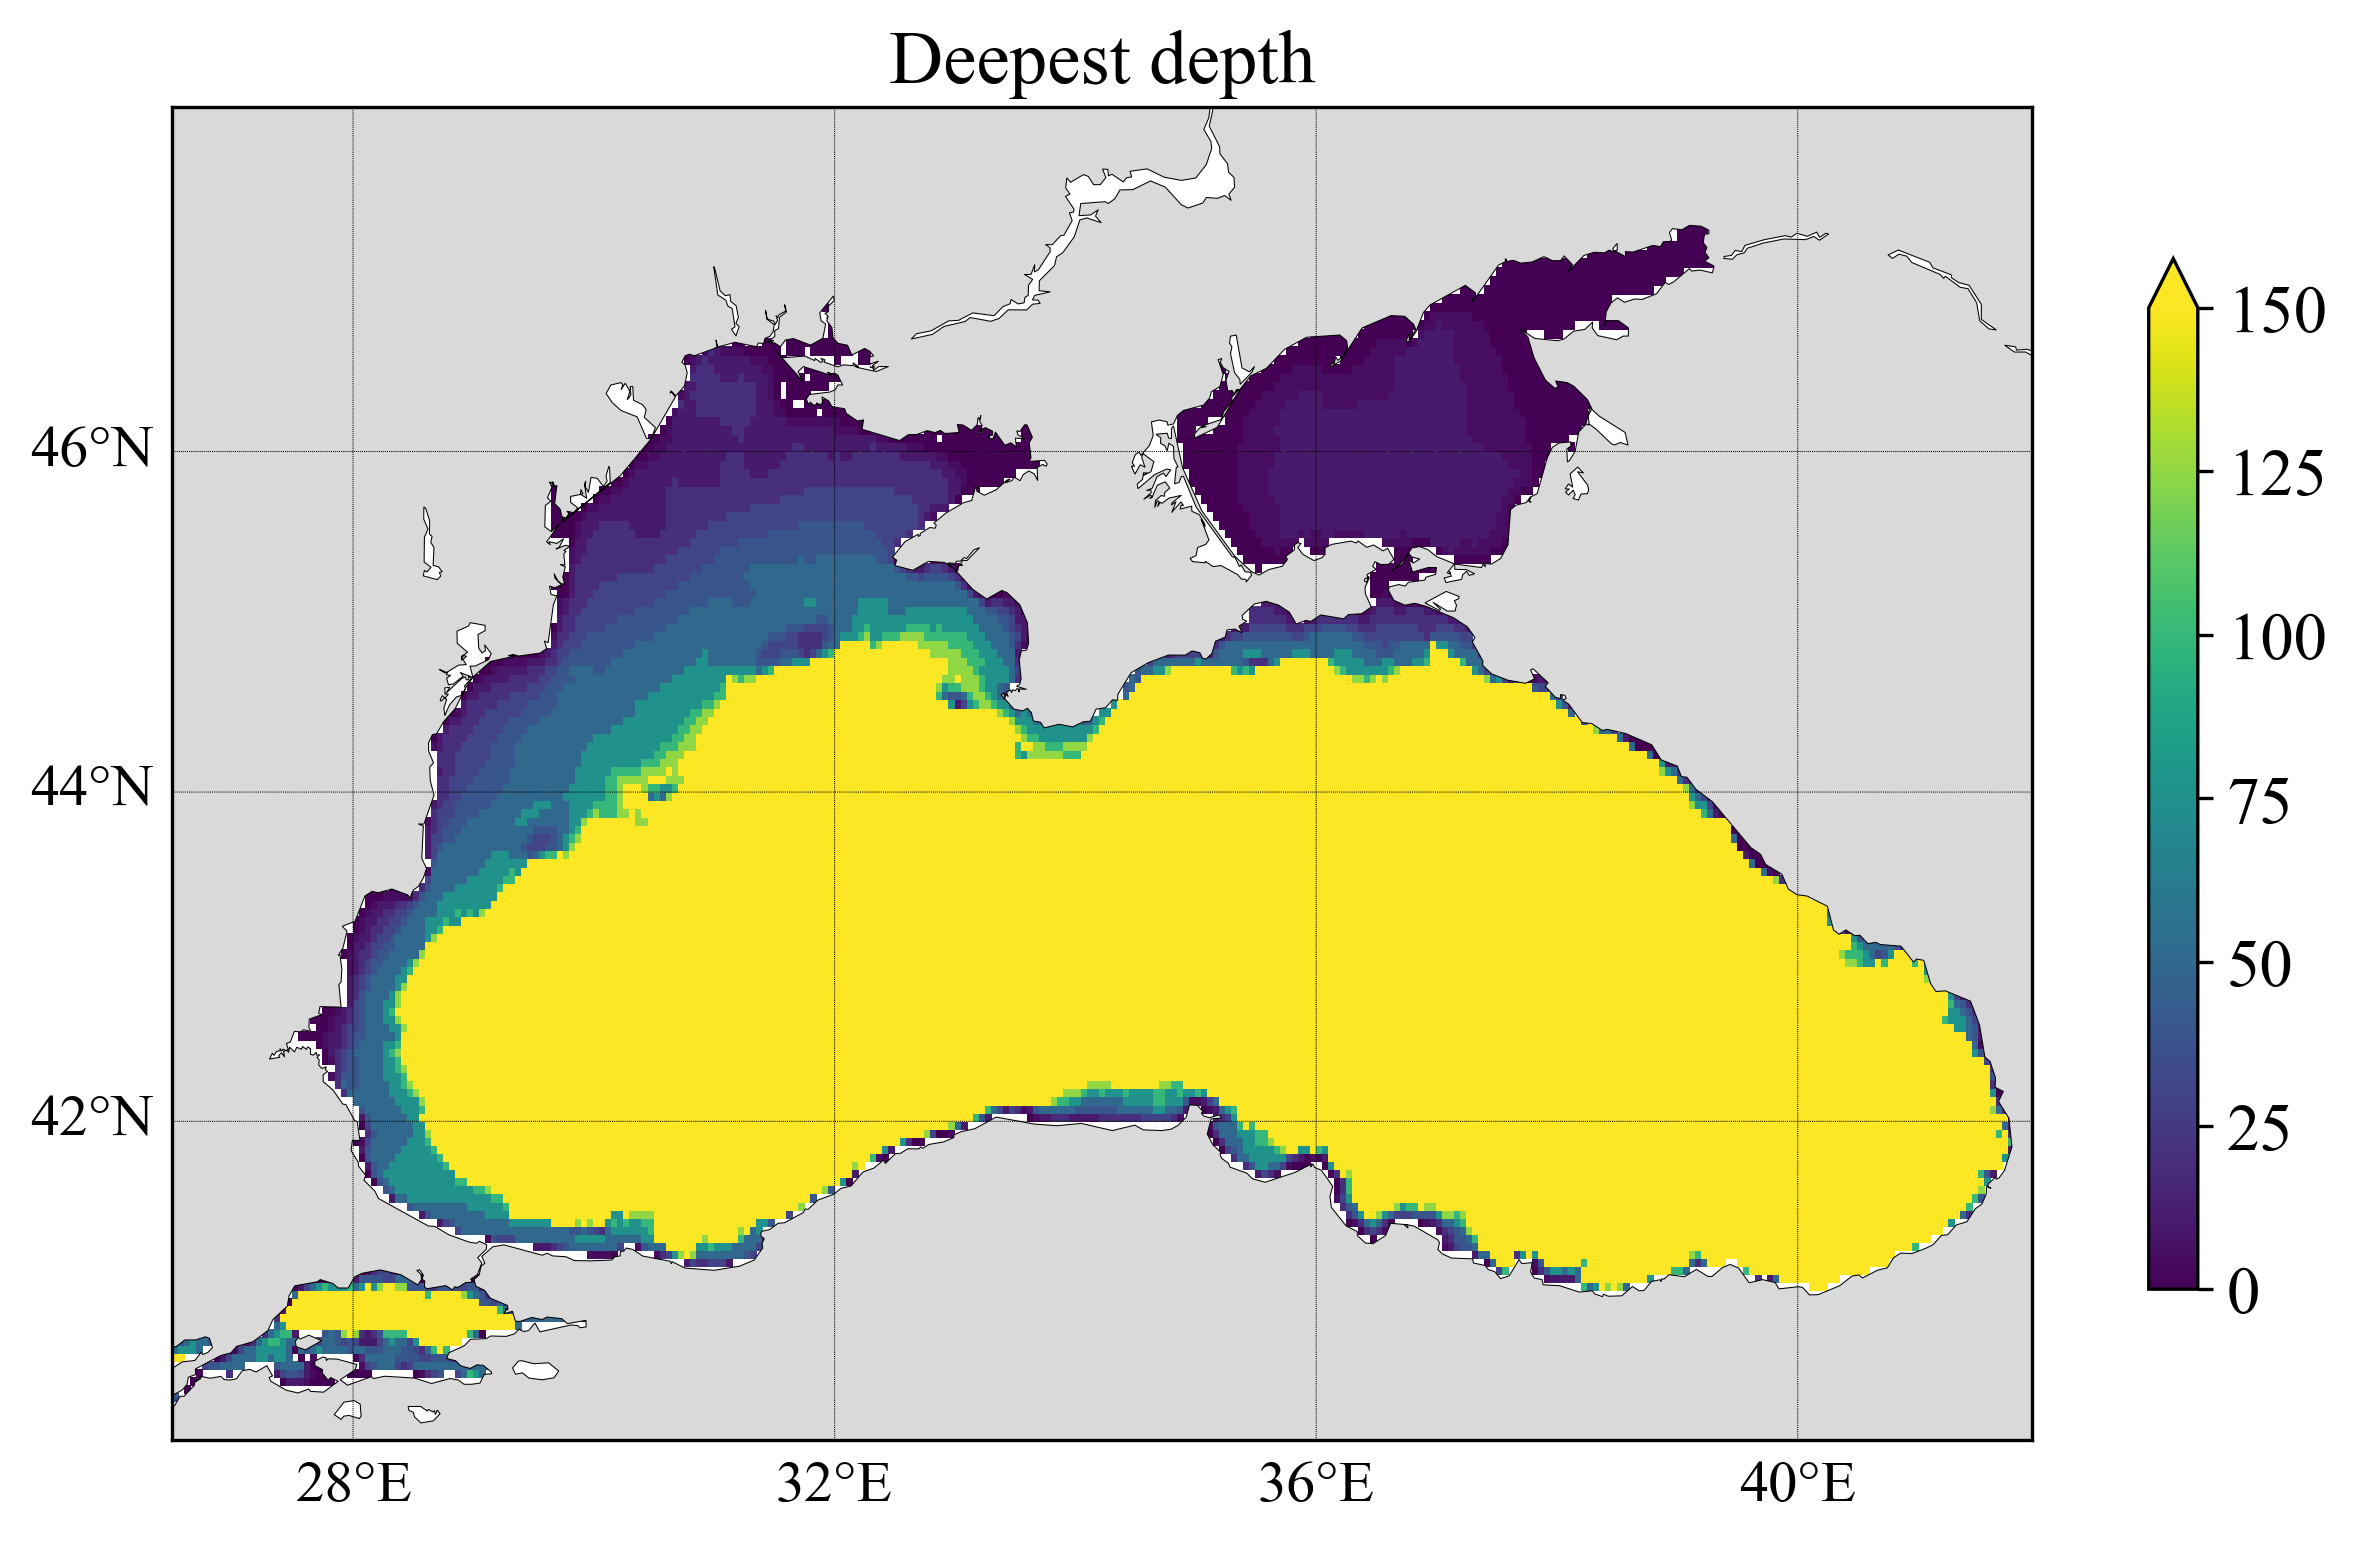

In [13]:
plt.figure(figsize=(10, 7))
pcm = m.pcolormesh(llon, llat, deepestdepth, latlon=True, vmin=0.)
plt.colorbar(pcm, extend="max", shrink=0.65)
m.drawmeridians(np.arange(-40., 60., 4.), zorder=2, labels=[0, 0, 0, 1], fontsize=14,
                linewidth=.25)
m.drawparallels(np.arange(20., 80., 2.), zorder=2, labels=[1, 0, 0, 0], fontsize=14,
                linewidth=.25)
m.fillcontinents(color=".85")
m.drawcoastlines(linewidth=.25)
plt.title("Deepest depth", fontsize=18)
plt.savefig("./deepest_depth_example.jpg", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [65]:
5652. / np.sqrt(2.)

3996.567527266366